# Исследование объявлений о продаже квартир

В нашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нужно определить рыночную стоимость объектов недвижимости. Наша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

## Изучение данных из файла

Импорт библиотек и получение основной информации по данным

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv('datasets/real_estate_data.csv', sep = '\t')
data.info()
data.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [3]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


<b>Вывод</b>

Таблица имеет 22 столбца. В 14 столбцах имеются пропуски с которыми придется поработать.
Тип данных различается: bool(2), float64(14), int64(3), object(3). Для многих столбцов нужно будет поменять тип данных.
Из странных значений бросается минимальная и максимальная высота потолков в 1 и 100 метров, что впринципе не возможно. Минимальное количество комнат 0, что то же не возможно. Подозрительными выглядят минимальная жилая площать в 2 м2 и площадь кухни в 1,3 м2.

## Предобработка данных

In [4]:
# Смотрим общую информацию по пропускам:
data.isnull().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [5]:
# Пропуски в 'locality_name' не будем угадывать и просто удалим эти строки т.к они занимают малый обьем от всего датасета.
data.dropna(subset=['locality_name'], inplace=True)
# Проверка:
data['locality_name'].isnull().sum()
# Так же приведем названия к одному регистру, заменим ё на е и удалим вспомогательные слова.
data['locality_name'] = data['locality_name'].str.lower().replace('ё', 'е', regex = True)
delete_words = ['поселок ', 'деревня ', 'село ', 'городского типа ', 'при железнодорожной станции ', 'городской ',
                'садовое товарищество ']
for name in delete_words:
    data['locality_name'] = data['locality_name'].replace(name, '', regex = True)

In [6]:
# Пропуски в 'balcony' заполняем нулями так как скорее всего балконов просто нет.
data['balcony'] = data['balcony'].fillna(0)
# Проверка:
data['balcony'].isnull().sum()

0

In [7]:
# Пропуски в 'floors_total' заменим на медианное значение для региона.
median_floors_region = data.groupby('locality_name')['floors_total'].median().round(0)

for local_name in median_floors_region.index:
    data.loc[data['locality_name'] == local_name, 'floors_total'] = data.loc[
             data['locality_name'] == local_name, 'floors_total'].fillna(median_floors_region[local_name])
# Проверка:
print('Кол-во строк с пропусками после замены:', data['floors_total'].isnull().sum())
# Проверка того, что значение этажа > нового медианного:
print('Кол-во строк где floor > floors_total:', len(data[data['floor'] > data['floors_total']]))
# Замена кол-ва этажей на текущий этаж квартиры:
for row in data:
    data.loc[data['floors_total'] < data['floor'], 'floors_total'] = data.loc[data['floors_total'] < data['floor'], 'floor']

Кол-во строк с пропусками после замены: 0
Кол-во строк где floor > floors_total: 32


In [8]:
# Пропуски в 'is_apartment' заменим на False. Скорее всего это поле оставили пустым по причине, что это не апартаменты.
data['is_apartment'] = data['is_apartment'].fillna(False)
# Проверка:
data['is_apartment'].value_counts()

False    23600
True        50
Name: is_apartment, dtype: int64

In [9]:
# Пропуски в 'ceiling_height' заменим на медианное значение по этажности зданий.
median_ceiling_heigh = data.groupby('floors_total')['ceiling_height'].median()

for floors in median_ceiling_heigh.index:
    data.loc[data['floors_total'] == floors, 'ceiling_height'] = data.loc[
             data['floors_total'] == floors, 'ceiling_height'].fillna(median_ceiling_heigh[floors])
# Проверка:
data['ceiling_height'].isnull().sum()
# Осталось единственное 33-х этажное здание без значения высоты потолков.
# Применим высоту потолков как у 34-х этажного.
data.loc[data['floors_total'] == 33, 'ceiling_height'] = data.loc[data['floors_total'] == 34, 'ceiling_height'].median()
data['ceiling_height'].isnull().sum()

0

In [10]:
# Пустые строки в 'days_exposition' говорят нам о том, что это обьявление еще не было снято с публикации.
# Заменим такие пропуски маркером -1
data['days_exposition'] = data['days_exposition'].fillna(-111)
data['days_exposition'].isnull().sum()

0

In [11]:
# Пустые строки в 'airports_nearest' заменим на среднее значение по городу.
mean_airports_nearest = data.groupby('locality_name')['airports_nearest'].mean()

for town in mean_airports_nearest.index:
    data.loc[data['locality_name'] == town, 'airports_nearest'] = data.loc[
             data['locality_name'] == town, 'airports_nearest'].fillna(mean_airports_nearest[town])
data['airports_nearest'].isnull().sum()
# Оставшиеся пустые строки, скорее всего указывают нам на то,что в этих городах нет поблизости аэропорта
# Пометим их маркером 500000
data['airports_nearest'] = data['airports_nearest'].fillna(555555)
data['airports_nearest'].isnull().sum()

0

In [12]:
# Пропуски в 'parks_around3000' заменим на 0 т.к скорее всего поле оставили пустым по причине отсутствия парка поблизости
data['parks_around3000'] = data['parks_around3000'].fillna(0)
# Проверка:
data['parks_around3000'].isnull().sum()

0

In [13]:
# Пропуски в 'ponds_around3000' заменим на 0 по той же причине
data['ponds_around3000'] = data['ponds_around3000'].fillna(0)
# Проверка:
data['parks_around3000'].isnull().sum()
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,False,...,25.00,0.0,санкт-петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,-111.0
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,2.75,11.0,18.60,1,False,...,11.00,2.0,шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,2.55,5.0,34.30,4,False,...,8.30,0.0,санкт-петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,2.60,14.0,NaN,9,False,...,NaN,0.0,санкт-петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,False,...,41.00,0.0,санкт-петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,2.65,12.0,14.40,5,False,...,9.10,0.0,янино-1,555555.0,NaN,0.0,NaN,0.0,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,2.66,26.0,10.60,6,False,...,14.40,1.0,парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,2.75,24.0,NaN,22,False,...,18.90,2.0,санкт-петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,-111.0
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,2.70,27.0,15.43,26,False,...,8.81,0.0,мурино,51553.0,NaN,0.0,NaN,0.0,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,False,...,6.50,2.0,санкт-петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [14]:
# Пропуски в 'parks_nearest' заполним средним значением по городу если 'parks_around3000' != 0
mean_parks_nearest = data.groupby('locality_name')['parks_nearest'].mean()

for town in mean_parks_nearest.index:
        data.loc[(data['locality_name'] == town) & (data['parks_around3000'] != 0), 'parks_nearest'] = data.loc[
                 (data['locality_name'] == town) & (data['parks_around3000'] != 0), 'parks_nearest'].fillna(mean_parks_nearest[town])
data['parks_nearest'].isnull().sum()
# Оставшиеся пустые строки, скорее всего указывают нам на то,что у этих квартир нет поблизости парка
# Замени значение на 0
data['parks_nearest'] = data['parks_nearest'].fillna(0)
data['parks_nearest'].isnull().sum()
# Проверка соответствия нулевых значений
data[(data['parks_around3000'] == 0) & (data['parks_nearest'] != 0)]
# Парки и в правду дальше 3000 метров. Оставим как есть.

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
1590,3,7500000.0,70.0,2017-07-11T00:00:00,2,2.70,18.0,37.0,13,False,...,10.0,0.0,санкт-петербург,14878.0,9791.0,0.0,3064.0,1.0,264.0,4.0
10959,9,3000000.0,31.1,2017-03-21T00:00:00,1,2.55,5.0,17.7,2,False,...,5.5,0.0,санкт-петербург,14821.0,9734.0,0.0,3190.0,1.0,431.0,234.0
19208,17,14950000.0,187.0,2017-10-12T00:00:00,5,3.00,2.0,80.0,2,False,...,17.0,1.0,санкт-петербург,36805.0,8656.0,0.0,3013.0,3.0,537.0,49.0
19430,9,3900000.0,30.5,2018-02-22T00:00:00,1,2.60,5.0,16.5,1,False,...,5.5,0.0,санкт-петербург,14821.0,9734.0,0.0,3190.0,1.0,431.0,176.0


In [15]:
# Пропуски в 'ponds_nearest' заполним средним значением по городу если 'ponds_around3000' != 0
# по аналогии с 'parks_nearest'
mean_ponds_nearest = data.groupby('locality_name')['ponds_nearest'].mean()

for town in mean_ponds_nearest.index:
        data.loc[(data['locality_name'] == town) & (data['ponds_around3000'] != 0), 'ponds_nearest'] = data.loc[
                 (data['locality_name'] == town) & (data['ponds_around3000'] != 0), 'ponds_nearest'].fillna(mean_ponds_nearest[town])
data['ponds_nearest'] = data['ponds_nearest'].fillna(0)
data['ponds_nearest'].isnull().sum()

0

In [16]:
# Для студий примим 'kitchen_area' = 0
data.loc[data['studio'] == True, 'kitchen_area'] = 0
# Отношение кухни к общей площади определим как коэффициент ratio_kitchen
data['ratio_kitchen'] = data['kitchen_area'] / data['total_area']
# Определим средний коэффициент в группе квартир с одинаковым кол-вом комнат
grouped_kitchen = data.groupby('rooms')['ratio_kitchen'].mean()
# Для пропущенных значений площади кухни рассчитаем ее, умножив средний коэффициент на общую площадь квартиры
for rooms in grouped_kitchen.index:
    data.loc[(data['rooms'] == rooms) & (data['kitchen_area'].isnull()), 'kitchen_area'] = data.loc[
             (data['rooms'] == rooms) & (data['kitchen_area'].isnull()), 'total_area'] * grouped_kitchen.loc[rooms]
data['kitchen_area'].isnull().sum()

0

In [17]:
#Пропуски в living_area можно заполнить разцицей общей площади и площади кухни.
data['living_area'] = data['living_area'].fillna(data['total_area'] - data['kitchen_area'])
data['living_area'].isnull().sum()

0

In [18]:
# Пропуски в cityCenters_nearest пометим большим маркером т.к скоре евсего эти квартиры относятся к пригороду или области
# и далеки от центра города
data['cityCenters_nearest'] = data['cityCenters_nearest'].fillna(444444)
data['cityCenters_nearest'].isnull().sum()

0

In [19]:
# заменим тип данных по дате публикации со строчного на datetime
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')
# В столбцах 'last_price', 'floors_total', 'balcony', 'airports_nearest', 'cityCenters_nearest', 'parks_around3000',
# 'parks_nearest', 'ponds_around3000', 'ponds_nearest', 'days_exposition' меняем тип данных с float на int.
# Нужен целочисленный формат а не копейки или сантиметры.
data['last_price'] = data['last_price'].astype(int)
data['floors_total'] = data['floors_total'].astype(int)
data['balcony'] = data['balcony'].astype(int)
data['airports_nearest'] = data['airports_nearest'].astype(int)
data['cityCenters_nearest'] = data['cityCenters_nearest'].astype(int)
data['parks_around3000'] = data['parks_around3000'].astype(int)
data['parks_nearest'] = data['parks_nearest'].astype(int)
data['ponds_around3000'] = data['ponds_around3000'].astype(int)
data['ponds_nearest'] = data['ponds_nearest'].astype(int)
data['days_exposition'] = data['days_exposition'].astype(int)
# Значения в 'ceiling_height' можно округлисть до 1 знака после запятой.
data['ceiling_height'] = data['ceiling_height'].round(1)

## Расчёты и добавление результатов в таблицу

In [20]:
# Расчет цены квадратного метра
data['price_m2'] = data['last_price'] / data['total_area']
data['price_m2'] = data['price_m2'].astype('int')
# Добавляем в таблицу день недели, месяц и год публикации
data['weekday'] = data['first_day_exposition'].dt.weekday
data['month'] = data['first_day_exposition'].dt.month
data['year'] = data['first_day_exposition'].dt.year
# Добавляем категоризацию по этажам
data.loc[data['floor'] == 1, 'floor_category'] = 'первый'
data.loc[data['floor'] == data['floors_total'], 'floor_category'] = 'последний'
data.loc[data['floor_category'].isna(), 'floor_category'] = 'другой'
# Cоотношение жилой и общей площади, а также отношение площади кухни к общей
data['living_area_ratio'] = data['living_area'] / data['total_area']
data['kitchen_area_ratio'] = data['kitchen_area'] / data['total_area']

data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_nearest,days_exposition,ratio_kitchen,price_m2,weekday,month,year,floor_category,living_area_ratio,kitchen_area_ratio
0,20,13000000,108.00,2019-03-07,3,2.7,16,51.000000,8,False,...,755,-111,0.231481,120370,3,3,2019,другой,0.472222,0.231481
1,7,3350000,40.40,2018-12-04,1,2.8,11,18.600000,1,False,...,0,81,0.272277,82920,1,12,2018,первый,0.460396,0.272277
2,10,5196000,56.00,2015-08-20,2,2.6,5,34.300000,4,False,...,574,558,0.148214,92785,3,8,2015,другой,0.612500,0.148214
3,0,64900000,159.00,2015-07-24,3,2.6,14,136.593117,9,False,...,234,424,NaN,408176,4,7,2015,другой,0.859076,0.140924
4,2,10000000,100.00,2018-06-19,2,3.0,14,32.000000,13,False,...,48,121,0.410000,100000,1,6,2018,другой,0.320000,0.410000
5,10,2890000,30.40,2018-09-10,1,2.6,12,14.400000,5,False,...,0,55,0.299342,95065,0,9,2018,другой,0.473684,0.299342
6,6,3700000,37.30,2017-11-02,1,2.7,26,10.600000,6,False,...,0,155,0.386059,99195,3,11,2017,другой,0.284182,0.386059
7,5,7915000,71.60,2019-04-18,2,2.8,24,52.700000,22,False,...,0,-111,0.263966,110544,3,4,2019,другой,0.736034,0.263966
8,20,2900000,33.16,2018-05-23,1,2.7,27,15.430000,26,False,...,0,189,0.265682,87454,2,5,2018,другой,0.465320,0.265682
9,18,5400000,61.00,2017-02-26,3,2.5,9,43.600000,7,False,...,0,289,0.106557,88524,6,2,2017,другой,0.714754,0.106557


## Исследовательский анализ данных

In [21]:
# Изучаем следующие параметры: площадь, цена, число комнат, высота потолков
data[['total_area', 'last_price', 'rooms', 'ceiling_height']].describe()

,total_area,last_price,rooms,ceiling_height
count,23650.000000,2.365000e+04,23650.000000,23650.000000
mean,60.329069,6.541127e+06,2.070106,2.747370
std,35.661808,1.089640e+07,1.078620,0.994261
min,12.000000,1.219000e+04,0.000000,1.000000
25%,40.000000,3.400000e+06,1.000000,2.600000
50%,52.000000,4.650000e+06,2.000000,2.600000
75%,69.700000,6.799000e+06,3.000000,2.800000
max,900.000000,7.630000e+08,19.000000,100.000000


Средняя квартира выставленная на продажу выглядит так: Двухкомнатная квартира площадью 52 кв.м с потолками 2.6 метра по цене 4.65 млн. рублей.
Площадь квартир колеблется от 12 до 900 квадратных метров.
Стоимость самой дешевой 12 тысяч, самой дорогой 763 миллиона.
Число комнат - от 0 (студия или нежелые помощения) до 19.
Высота потолков от 1 до 100 метров.

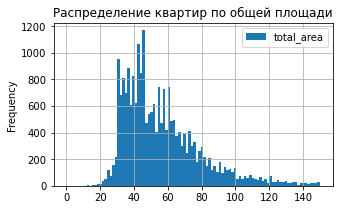

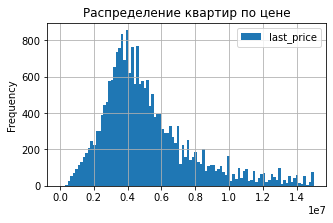

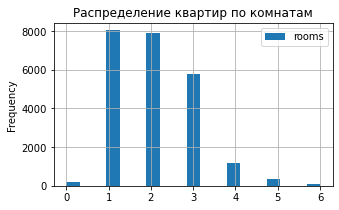

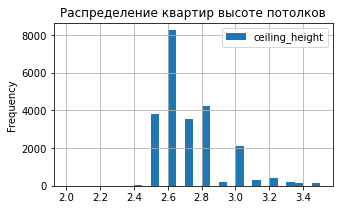

In [22]:
# Построем гистограммы для каждого параметра
data.plot(y = 'total_area', 
          kind = 'hist', 
          bins = 100, 
          grid=True, 
          figsize = (5,3), 
          range = (0,150),
          title = 'Распределение квартир по общей площади')
plt.show()
data.plot(y = 'last_price', 
          kind = 'hist', 
          bins = 100, 
          grid=True, 
          figsize = (5,3),
          range = (0,15000000),
          title = 'Распределение квартир по цене')
plt.show()
data.plot(y = 'rooms', 
          kind = 'hist', 
          bins = 19, 
          grid=True, 
          figsize = (5,3), 
          range = (0,6),
          title = 'Распределение квартир по комнатам')
plt.show()
data.plot(y = 'ceiling_height', 
          kind = 'hist', 
          bins = 30, 
          grid=True, 
          figsize = (5,3),
          range = (2,3.5),
          title = 'Распределение квартир высоте потолков')
plt.show()

Большая часть квартир имеет метраж от 30 до 80 кв.м. с пиком на 45 кв.м. Есть квартиры с 300-900 кв.м. но это еденичные выбросы.
Цены на квартиры лежат в диапазоне от 2 до 15 млн. Большинство приходится на диапазон от 3 до 6 млн. Есть выбросы, но они не мешают.
Большинство квартир имеют 1 или 2 комнаты, чуть меньше представлены 3-х комнатные квартиры, есть небольшое колличество 4-х комнатных квартир. Есть квартиры имеющие большее количество комнат, но их еще меньше.
Большинство квартир имеют высоту потолков от 2,5 до 3 метров. Остальные варианты  представлены в очень маленьком количестве.

In [23]:
# Изучим время продажи квартиры
data[data['days_exposition'] != -111]['days_exposition'].describe().to_frame()
# Среднее значение продажи - 181 день
# Медианное значение продажи - 95 дней

,days_exposition
count,20470.000000
mean,180.753200
std,219.777916
min,1.000000
25%,45.000000
50%,95.000000
75%,231.000000
max,1580.000000


3-6 месяцев вполне хороший срок для продажи квартиры. Есть большие выбивающиеся значения. Предположу, что это эксклюзивное дорогое жилье на которое годами может искаться покупатель.

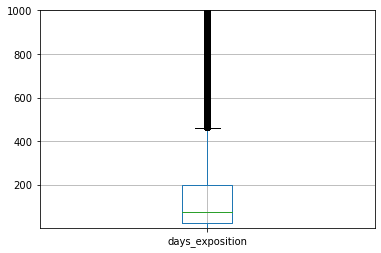

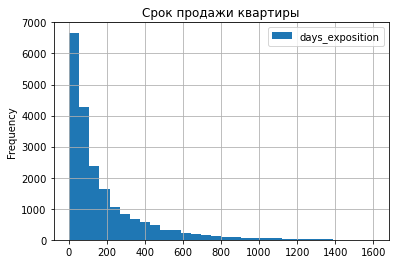

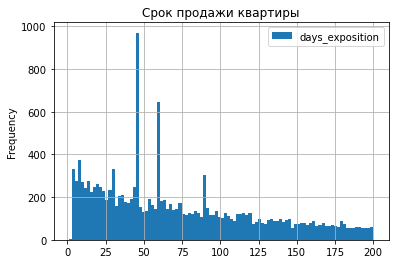

In [24]:
data.boxplot(column='days_exposition')
plt.ylim(1,1000)
data.plot(y = 'days_exposition', 
          kind = 'hist', 
          bins = 30, 
          grid = True, 
          range = (1,1600),
          title = 'Срок продажи квартиры')
plt.show()
data.plot(y = 'days_exposition', 
          kind = 'hist', 
          bins = 100, 
          grid = True, 
          range = (1,200),
          title = 'Срок продажи квартиры')
plt.show()

Необычно долгими продажами можно считать продажи свыше 500 дней, что выше верхнего уса на диаграме размаха.
Необычно быстрыми продажами можно считать продажи совершенные в первые 7 дней(неделю).
При детальном просмотре до 200 дней на гистограмме видны аномальные пики у 45, 60 и 90 дней.

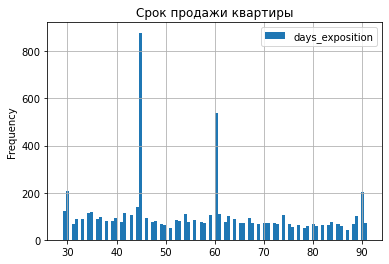

In [25]:
data.plot(y = 'days_exposition', 
          kind = 'hist', 
          bins = 100, 
          grid = True, 
          range = (29,91),
          title = 'Срок продажи квартиры')
plt.show()

Можно предположить, что на 30,45,60,75 и 90 днях обьявление автоматически снимается с публикации или по средствам электронной связи с хозяином квартиры уточняется продалась ли уже квартира или нет.

In [26]:
# Почистим данные от выбросов по основным столбцам
# Сделаем функцию по определению верхних усов
def whiskers(column):
    stats = data[column].describe()
    iqr = stats[6] - stats[4]
    lw = stats[4] - 1.5 * iqr
    rw = stats[6] + 1.5 * iqr
    if lw < stats[3]: lw = stats[3] # левый "ус" не должен быть меньше минимального значения
    if rw > stats[7]: rw = stats[7] # правый "ус" не должен быть больше максимального значения
    return [lw, rw]

whiskers('last_price')

[12190.0, 11897500.0]

In [27]:
whiskers('total_area')

[12.0, 114.25]

In [28]:
whiskers('rooms')

[0.0, 6.0]

In [29]:
whiskers('ceiling_height')

[2.3000000000000007, 3.0999999999999996]

In [30]:
# Оставляем квартиры до 12 милионов, с площадью до 120 кв.м., высотой потолков не более 3,1 м. и не более 6 комнат.
good_data = data.query(
    '12190 <= last_price <= 12000000 and 12 <= total_area <= 120 and 0 <= rooms <= 6 and 2.3 <= ceiling_height <= 3.1')
# Доля отфильтрованных значений от основного датасета
print('Доля отфильтрованных значений составила: {:.1%}'.format(len(good_data) / len(data)))

Доля отфильтрованных значений составила: 88.3%


Потеря 11,7% данных от основного обьема данных не выглядит существенной, но позволит нам более адекватно оценить рынок недвижимости без различных выбросов.

Коэффициент корреляции Пирсона: 0.6924817893015236


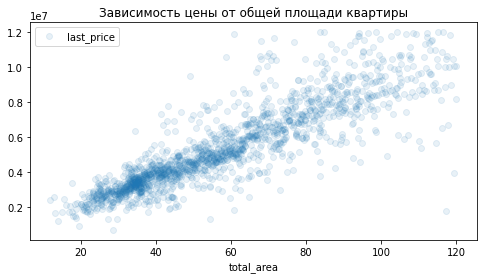

In [31]:
#Изучаем зависимость цены от площади
total_area_price = good_data.pivot_table(index = 'total_area', values = 'last_price')
total_area_price.plot(style = 'o', 
                      alpha = 0.1,
                      title = 'Зависимость цены от общей площади квартиры',
                      figsize = (8,4))
print('Коэффициент корреляции Пирсона:', good_data['total_area'].corr(good_data['last_price']))

Цена квартиры напрямую зависит от общей площади

Коэффициент корреляции Пирсона: 0.4271669556264362


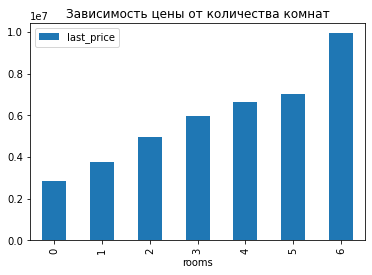

In [32]:
#Изучаем зависимость цены от числа комнат
rooms_price = good_data.pivot_table(index = 'rooms', values = 'last_price')
rooms_price.plot(kind='bar',
                 title = 'Зависимость цены от количества комнат')
print('Коэффициент корреляции Пирсона:', good_data['rooms'].corr(good_data['last_price']))

Цена квартиры так же имеет линейную зависимость от количества комнат.

Коэффициент корреляции Пирсона: -0.4903376651907317


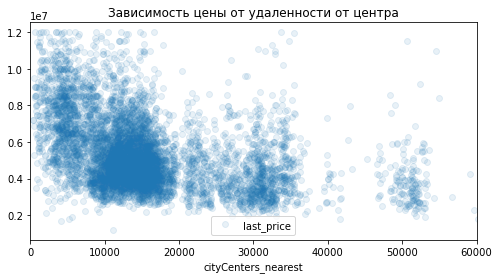

In [33]:
#Изучаем зависимость цены от удаленности от центра
cityCenters_price = good_data.pivot_table(index = 'cityCenters_nearest', values = 'last_price')
cityCenters_price.plot(style = 'o', 
                       xlim = (0,60000), 
                       alpha = 0.1,
                       title = 'Зависимость цены от удаленности от центра',
                       figsize = (8,4))
print('Коэффициент корреляции Пирсона:', good_data['cityCenters_nearest'].corr(good_data['last_price']))

Чем дальше от центра, тем в среднем меньше будет стоить квартира. Разница между первым и 10 километром в среднем будет отличаться на 2-3 миллиона.

<AxesSubplot:title={'center':'Зависимость цены от этажа квартиры'}, xlabel='floor_category'>

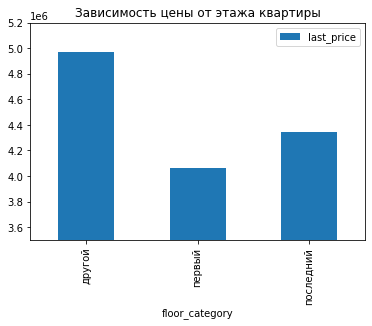

In [34]:
# Изучаем зависимость цены от того, на каком этаже расположена квартира
floor_type_price = good_data.pivot_table(index='floor_category', values='last_price')
floor_type_price.plot(kind='bar', 
                      ylim = (3500000, 5200000),
                      title = 'Зависимость цены от этажа квартиры')

Квартира на первом этаже будет в среднем на 20% дешевле, чем на других этажах кроме последнего. На последнем этаже, подороже чем на первом, но все так же дешевле чем на других этажах.

Коэффициент корреляции Пирсона: -0.012373865078703805


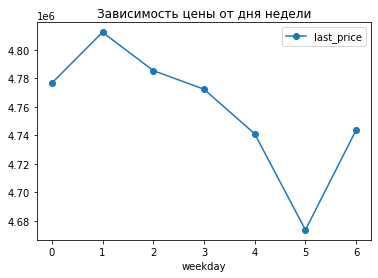

In [35]:
# Изучим зависимость от даты размещения: дня недели
weekday_price = good_data.pivot_table(index='weekday', values='last_price')
weekday_price.plot(style = 'o-',
                   title = 'Зависимость цены от дня недели')
print('Коэффициент корреляции Пирсона:', good_data['weekday'].corr(good_data['last_price']))

Судя по всему в будние дни цены самые высокие. И по ходу рабочей недели люди понемногу скидывают цену. Так в субботу цена в среднем на 100 тыс. дешевле чем  дешевле чем в понедельник.

Коэффициент корреляции Пирсона: 0.0039027910490469745


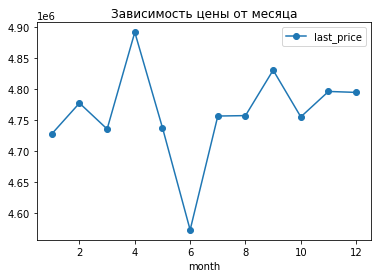

In [36]:
# Изучим зависимость от даты размещения: месяца
month_price = good_data.pivot_table(index='month', values='last_price')
month_price.plot(style = 'o-',
                 title = 'Зависимость цены от месяца')
print('Коэффициент корреляции Пирсона:', good_data['month'].corr(good_data['last_price']))

Самые дорогие квартиры в апреле, а самые дешевые летом в июне. В начале весны цены растут из за увеличения светевого дня и улучшения погоды вследствии чего люди более склонны к просмотрам квартиры. А ближе к лету спрос падает из-за начала отпусков и дачного сезона.

Коэффициент корреляции Пирсона: 0.00584875641170878


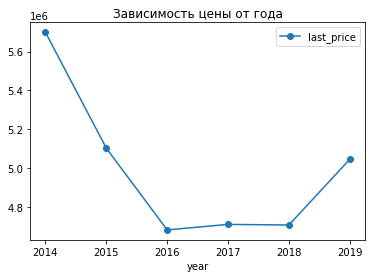

In [37]:
# Изучим зависимость от даты размещения: года
year_price = good_data.pivot_table(index='year', values='last_price')
year_price.plot(style = 'o-',
                title = 'Зависимость цены от года')
print('Коэффициент корреляции Пирсона:', good_data['year'].corr(good_data['last_price']))

Цены 2014-2015 года сильно выделяются. Можно предположить, что такой ажиотаж на рынке недвижимости обусловлен резким ослаблением рубля по отношению к основным мировым валютам в 2014 году. А рост цен на недвижимость с 2018 года обусловлен и увеличением затрат застройщиками и увеличением спроса на недвижимость.

In [38]:
# Выберем десять городов с наибольшим количеством обьявлений
top_ten = good_data.pivot_table(index = 'locality_name', values = 'price_m2', aggfunc=['count', 'mean'])
top_ten.columns = ['count', 'mean_m2']
top_ten.sort_values('count', ascending=False).head(10).round(1)

,count,mean_m2
locality_name,,
санкт-петербург,13152,105563.8
мурино,588,86064.4
кудрово,469,95152.5
шушары,438,78643.4
всеволожск,390,67161.2
колпино,328,75306.9
пушкин,327,100298.0
парголово,326,90331.8
гатчина,299,68592.6


Населеные пункты с самой высокой стоимостью жилья как и ожидалось Санкт-Петербург и Пушкин. Самая низкая стоимость в Выборге - она приблизительно в 2 раза меньше чем в Санкт-Петербурге.

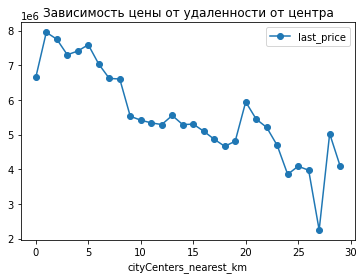

In [39]:
# Выделим квартиры в Санкт-Петербурге
# и посчитаем среднюю цену для каждого километра
good_data['cityCenters_nearest_km'] = round(good_data['cityCenters_nearest']/1000)
good_data_spb = good_data.query('locality_name == "санкт-петербург" and cityCenters_nearest !=444444').pivot_table(
    index = 'cityCenters_nearest_km', values = 'last_price')
good_data_spb.plot(style = 'o-',
                   title = 'Зависимость цены от удаленности от центра')
plt.show()

Между 8 и 9 километрами разница около миллиона рублей. Таким образом, будем считать центром Санкт-Петербурга окружность радиусом 8 км.

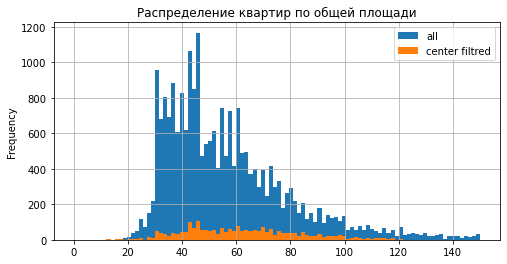

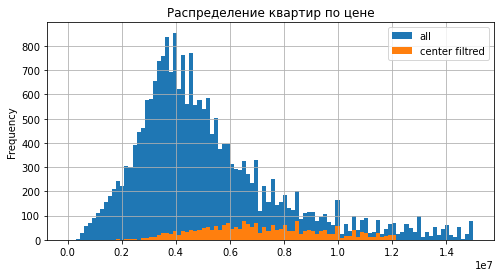

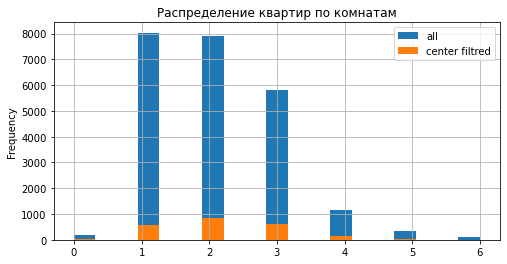

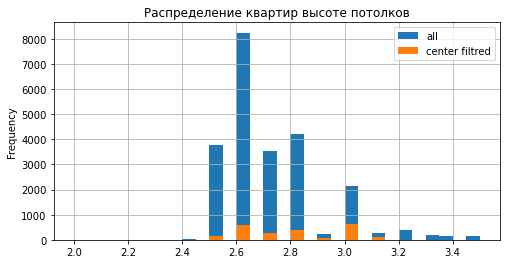

In [40]:
# Выделим сегмент квартир в центре
# и изучим площадь, цена, число комнат, высота потолков
spb_center = good_data.query('locality_name == "санкт-петербург" and cityCenters_nearest_km <= 8')
ax = data.plot(y = 'total_area', 
               kind = 'hist', 
               bins = 100, 
               grid=True, 
               figsize = (8,4), 
               range = (0,150),
               label = 'all')
spb_center.plot(y = 'total_area', 
                kind = 'hist', 
                bins = 100, 
                grid=True, 
                figsize = (8,4), 
                range = (0,150),
                ax = ax,
                label = 'center filtred',
                title = 'Распределение квартир по общей площади')
plt.show()
ax = data.plot(y = 'last_price', 
               kind = 'hist', 
               bins = 100, 
               grid=True, 
               figsize = (8,4),
               range = (0,15000000), 
               label = 'all')
spb_center.plot(y = 'last_price', 
                kind = 'hist', 
                bins = 100, 
                grid=True, 
                figsize = (8,4),
                range = (0,15000000),
                ax = ax,
                label = 'center filtred',
                title = 'Распределение квартир по цене')
plt.show()
ax = data.plot(y = 'rooms', 
               kind = 'hist', 
               bins = 19, 
               grid=True, 
               figsize = (8,4), 
               range = (0,6),
               label = 'all')
spb_center.plot(y = 'rooms', 
                kind = 'hist', 
                bins = 19, 
                grid=True, 
                figsize = (8,4), 
                range = (0,6),
                ax = ax,
                label = 'center filtred',
                title = 'Распределение квартир по комнатам')
plt.show()
ax = data.plot(y = 'ceiling_height',
               kind = 'hist', 
               bins = 30, 
               grid=True,
               figsize = (8,4),
               range = (2,3.5),
               label = 'all')
spb_center.plot(y = 'ceiling_height', 
                kind = 'hist', 
                bins = 30, 
                grid=True, 
                figsize = (8,4),
                range = (2,3.5),
                ax = ax,
                label = 'center filtred',
                title = 'Распределение квартир высоте потолков')
plt.show()

Большая часть квартир имеет метраж от 30 до 80 кв.м. с пиком на 45 кв.м.
Цены на квартиры лежат в диапазоне от 3 до 12 млн. Большинство приходится на диапазон от 6 до 10 млн.
Большинство квартир имеют 2 комнаты, чуть меньше представлены 3-х комнатные и однокомнатные квартиры, есть небольшое колличество 4-х комнатных квартир. Есть квартиры имеющие большее количество комнат, но их еще меньше.
Большинство квартир имеют высоту потолков от 2,6 до 3 метров.

Коэффициент корреляции Пирсона: 0.45644020829237864


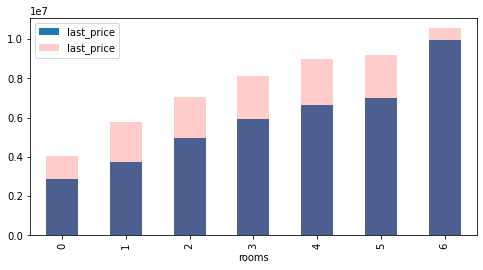

In [41]:
#Изучаем зависимость цены от числа комнат
rooms_price_сenter = spb_center.pivot_table(index = 'rooms', values = 'last_price')
ax = rooms_price.plot(kind='bar', 
                      label ='all',
                      figsize = (8,4))

rooms_price_сenter.plot(kind='bar', 
                        ax = ax, 
                        alpha = 0.2, 
                        label = 'center filtred', 
                        figsize = (8,4),
                        color = 'red')

print('Коэффициент корреляции Пирсона:', spb_center['rooms'].corr(spb_center['last_price']))

Чем больше комнат, тем выше цена. Центр ничем не удивил.

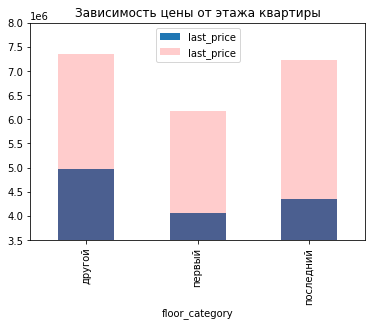

In [42]:
# Изучаем зависимость цены от того, на каком этаже расположена квартира
floor_type_price_center = spb_center.pivot_table(index='floor_category', values='last_price')
ax = floor_type_price.plot(kind='bar', 
                           ylim = (3500000, 5200000),
                           label = 'all')
floor_type_price_center.plot(kind='bar', 
                             ylim = (3500000, 8000000), 
                             title = 'Зависимость цены от этажа квартиры', 
                             ax = ax, 
                             alpha = 0.2,
                             label = 'center filtred',
                             color = 'red')
plt.show()

Квартира на первом этаже будет в среднем на 25% дешевле, чем на других этажах. И в центре уже цена на последние этажи намного дороже, чем на окраинах. Виды в центре с последних этаже все же красивее.

Коэффициент корреляции Пирсона: -0.1621581090043664


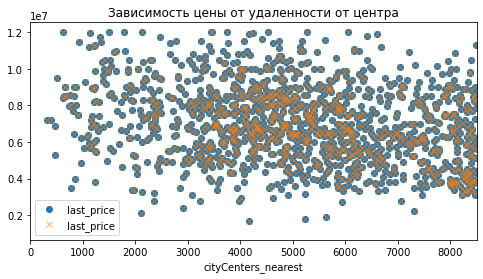

In [43]:
#Изучаем зависимость цены от удаленности от центра
Centers_price = spb_center.pivot_table(index = 'cityCenters_nearest', values = 'last_price', aggfunc = 'mean')
ax = cityCenters_price.plot(style = 'o', 
                            xlim = (0,8500), 
                            alpha = 1,
                            figsize = (8,4), 
                            label = 'all')
Centers_price.plot(style = 'x', 
                   xlim = (0,8500), 
                   alpha = 0.6, 
                   ax = ax, 
                   title = 'Зависимость цены от удаленности от центра', 
                   label = 'center filtred')
print('Коэффициент корреляции Пирсона:', spb_center['cityCenters_nearest'].corr(spb_center['last_price']))

Чем дальше от центра, тем в среднем меньше будет стоить квартира

Коэффициент корреляции Пирсона: 0.0017811658812731408


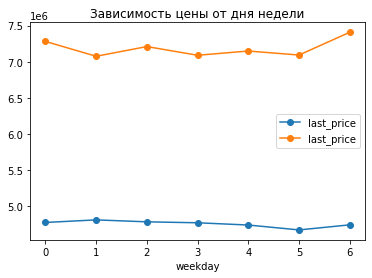

In [44]:
# Изучим зависимость от даты размещения: дня недели
weekday_price_center = spb_center.pivot_table(index='weekday', values='last_price')
ax = weekday_price.plot(style = 'o-',
                        label = 'all')
weekday_price_center.plot(style = 'o-', 
                          ax = ax, 
                          label = 'center filtred', 
                          title = 'Зависимость цены от дня недели')
print('Коэффициент корреляции Пирсона:', spb_center['weekday'].corr(spb_center['last_price']))

В центре к удивлению самые дорогие цены оказались в воскресенье

Коэффициент корреляции Пирсона: -0.01662675520860484


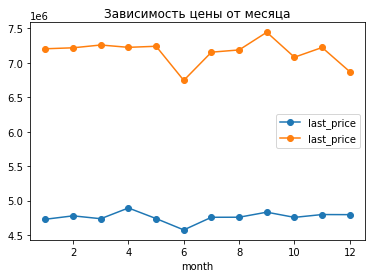

In [45]:
# Изучим зависимость от даты размещения: месяца
month_price_center = spb_center.pivot_table(index='month', values='last_price')
ax = month_price.plot(style = 'o-',
                      label = 'all')
month_price_center.plot(style = 'o-', 
                        ax = ax, 
                        label = 'center filtred', 
                        title = 'Зависимость цены от месяца')
print('Коэффициент корреляции Пирсона:', spb_center['month'].corr(spb_center['last_price']))

Все так же застойное начало лета и видим снижение покупательской способности перед новогодними праздниками.

Коэффициент корреляции Пирсона: -0.013856537139945833


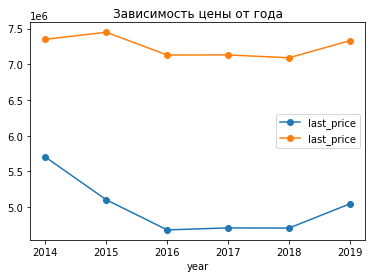

In [46]:
# Изучим зависимость от даты размещения: года
year_price_center = spb_center.pivot_table(index='year', values='last_price')
ax = year_price.plot(style = 'o-',
                     label = 'all')
year_price_center.plot(style = 'o-', 
                       ax = ax, 
                       label = 'center filtred', 
                       title = 'Зависимость цены от года')
print('Коэффициент корреляции Пирсона:', spb_center['year'].corr(spb_center['last_price']))

Зависимость цены от года публикации в центре ничем не отличается от такой же зависимости по всем данным.

Изучая квартиры в центре можно сказать, что:
- Квартира в центре стоит в среднем на 2 млн. дороче чем среднестатисчтическая по всем данным.
- В центре больше преобладают двухкомнатные квартиры. В общей массе такого преобладания не было.
- В центре квартир с высотой потолков 3+ метра значительно больше в % чем в основной массе квартир.
- На последнем этаже квартиры в центре выглядят более привлекательно, чем на окраине.
- В центре "выходные" квартиры дороче, чем в будни. В общей массе было все с точностью до наоборот.
- В остальном зависимости в центре и в общей массе очень похожи.

## Общий вывод

Изучив даннные из сервиса Яндекс.Недвижимость можно сделать выводы, которые указывают на то, что конечная цена квартиры больше всего зависит от:
- Метража. Чем больше площадь квартиры, тем выше цена.
- Цены за квадратный метр. Чем больше цена за квадратный метр, тем выше цена.
- Доли жилой площади/кухни. Чем выше доля жилой площади/площадь кухни, тем выше цена.
- Количества комнат. Чем больше комнат, тем выше цена.
- Этажа. На первом этаже квартира дешевле, чем на остальных.
- Удаленности от центра. Чем ближе к центру, тем дороже квартира. Это относится и к самому центру.
- День размещения объявления. Квартиры, размещенные к продаже в будние дни, в среднем дороже, чем размещенные в выходные.
- Месяц размещения объявления. Квартиры, размещенные к продаже в начале лета, в среднем дешевле, чем размещенные в любые другие месяца.
- Год размещения объявления. Квартиры, размещенные к продаже в 2014-2015 году, дороже всех. Период 2016-2018 - период низких цен на квартиры. 2019г - цены пошли вверх впервые после наступления кризиса 2014 года.

Квартиры в центральной части города выделаются за счет:
- Более дорогой цены (в среднем на 2 млн).
- Большего количества двухкомнатных квартир.
- Большего количества квартир с потолками 3м и более.
- Более высоких цен на квартиры на последнем этаже.
- Самыми дорогими ценами в выходные
- Падения спроса на такие квартиры перед новогодними праздниками.